PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


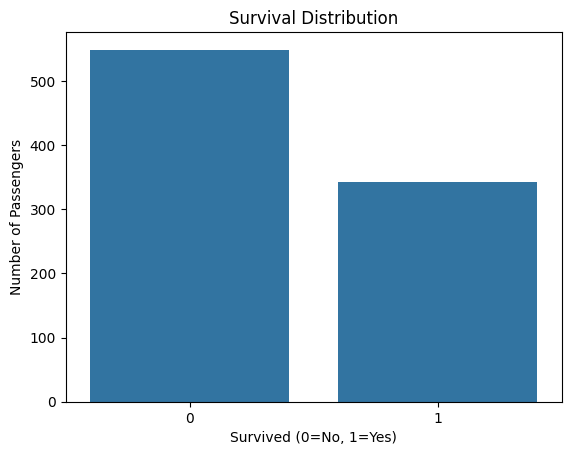

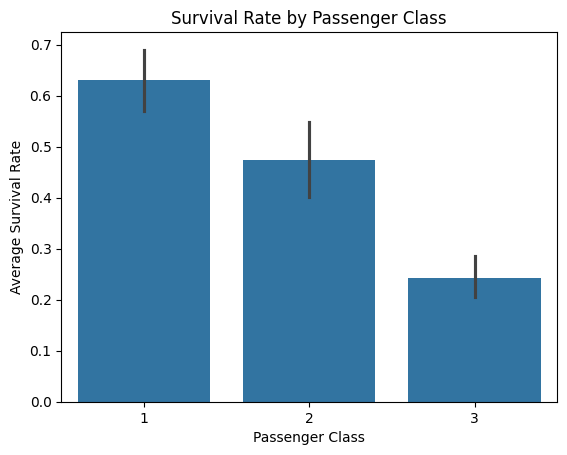

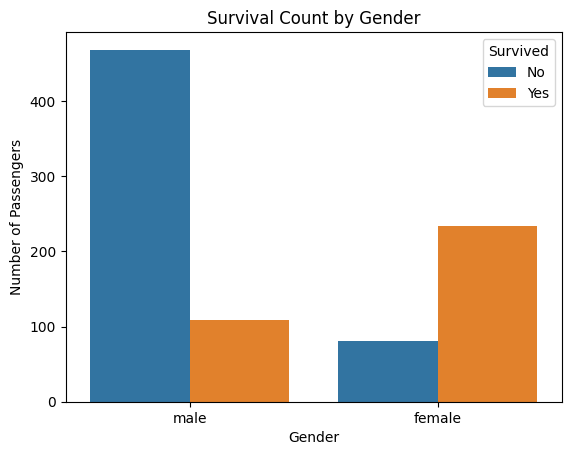

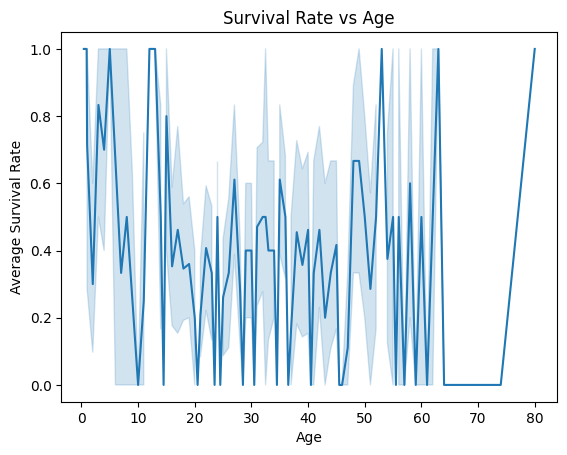

   Pclass  Sex   Age
0       3    1  22.0
1       1    0  38.0
2       3    0  26.0
3       1    0  35.0
4       3    1  35.0
Confusion Matrix:
 [[91 14]
 [20 54]]
Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
Model saved as titanic.pkl


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual dataset path)
data = pd.read_csv('titanic.csv')

# Check for missing values
print(data.isnull().sum())

# Visualization 1: Survival Distribution
sns.countplot(x="Survived", data=data)
plt.title("Survival Distribution")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Number of Passengers")
plt.show()

# Visualization 2: Survival Rate by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Survival Rate")
plt.show()

# Visualization 3: Survival Count by Gender
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Visualization 4: Survival Rate vs Age
sns.lineplot(x="Age", y="Survived", data=data)
plt.title("Survival Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Average Survival Rate")
plt.show()

# Handle missing values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Drop the 'Cabin' column as it has many missing values
data = data.drop("Cabin", axis=1)

# Encode categorical 'Sex' column
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})

# Feature selection
features = ["Pclass", "Sex", "Age"]
X = data[features]
y = data["Survived"]

print(X.head())

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Save the model using pickle
import pickle
pickle.dump(model, open("titanic.pkl", "wb"))
print("Model saved as titanic.pkl")
